# Clientes y ventas de un negocio de articulos tecnologicos

Swietenia Naomi Medina Gasca

Lunes 23 de junio de 2025

In [ ]:
#importar las bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Extracción de datos**

In [ ]:
#cargar los archivos de VENTAS
ventas=pd.read_csv('VER_ventas_2000.csv')

#mostrar los primeros registros
ventas.head(2)


,id_venta,cliente_id,producto,cantidad,precio_unitario,region,fecha,metodo_pago,descuento,total
0,1,1195,Teclado,5,543.89,Sur,2025-05-23 00:28:17.173264,Tarjeta,0.21,2148.3655
1,2,1076,USB,2,1185.70,Oeste,2025-02-03 00:28:17.173284,Tarjeta,0.13,2063.1180


In [ ]:
#cargar los archivos de CLIENTES
clientes=pd.read_csv('VER_clientes_2000.csv')

#mostrar los primeros registros
clientes.head(2)


,cliente_id,nombre,edad,tipo_cliente
0,1001,Cliente_1,56,Premium
1,1002,Cliente_2,69,Regular


**Transformamos datos**

In [ ]:
#eliminar campos nulos
ventas=ventas.dropna()
clientes=clientes.dropna()

#dropduplicate para eliminar filas duplicadas

In [ ]:
#unir los archivos
ventas_clientes=pd.merge(ventas,clientes,on='cliente_id')
ventas_clientes.head(2)

,id_venta,cliente_id,producto,cantidad,precio_unitario,region,fecha,metodo_pago,descuento,total,nombre,edad,tipo_cliente
0,1,1195,Teclado,5,543.89,Sur,2025-05-23 00:28:17.173264,Tarjeta,0.21,2148.3655,Cliente_195,44,Regular
1,2,1076,USB,2,1185.70,Oeste,2025-02-03 00:28:17.173284,Tarjeta,0.13,2063.1180,Cliente_76,43,Regular


In [ ]:
#método para clasificacion de las ventas en categorias
def clasificar_venta(total):
  if total<300:
    return "Baja"
  elif total<1000 and total>=500:
    return "Media"
  else:
    return "Alta"

#agregar la columna
ventas_clientes ['categoria_venta']=ventas_clientes['total'].apply(clasificar_venta)

#mostrar los datos transformados
ventas_clientes.head(2)

,id_venta,cliente_id,producto,cantidad,precio_unitario,region,fecha,metodo_pago,descuento,total,nombre,edad,tipo_cliente,categoria_venta
0,1,1195,Teclado,5,543.89,Sur,2025-05-23 00:28:17.173264,Tarjeta,0.21,2148.3655,Cliente_195,44,Regular,Alta
1,2,1076,USB,2,1185.70,Oeste,2025-02-03 00:28:17.173284,Tarjeta,0.13,2063.1180,Cliente_76,43,Regular,Alta


**Cargar datos**

In [ ]:
ventas_clientes.to_csv('ventas_clientes_2000.csv')
print("datos exportados correctamente")

datos exportados correctamente


**Visualizacion de datos**

              Ventas totales x region

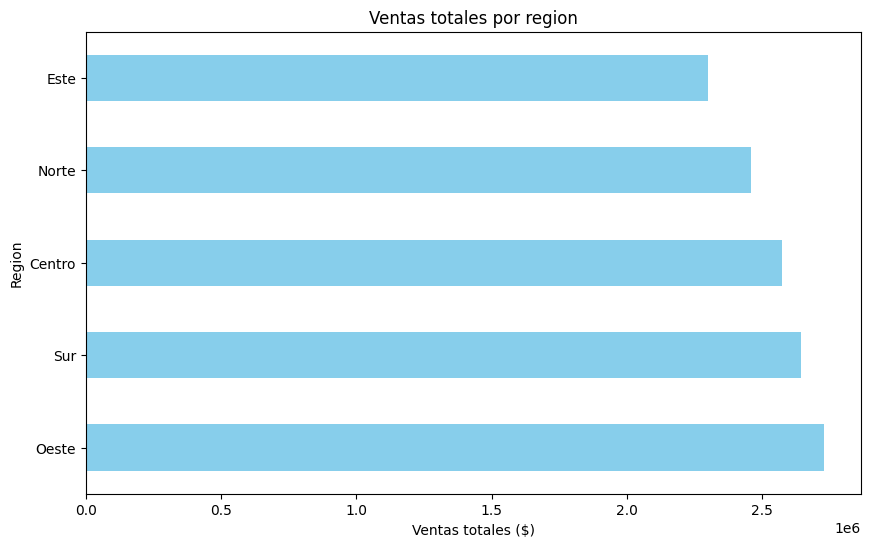

In [ ]:
#gráfico de barras
plt.figure(figsize=(10, 6))
ventas_region=ventas_clientes.groupby('region')['total'].sum().sort_values(ascending=False)
ventas_region.plot(kind='barh', color='skyblue')
plt.title('Ventas totales por region')
plt.xlabel('Ventas totales ($)')
plt.ylabel('Region')
plt.show()


              Rango de edades

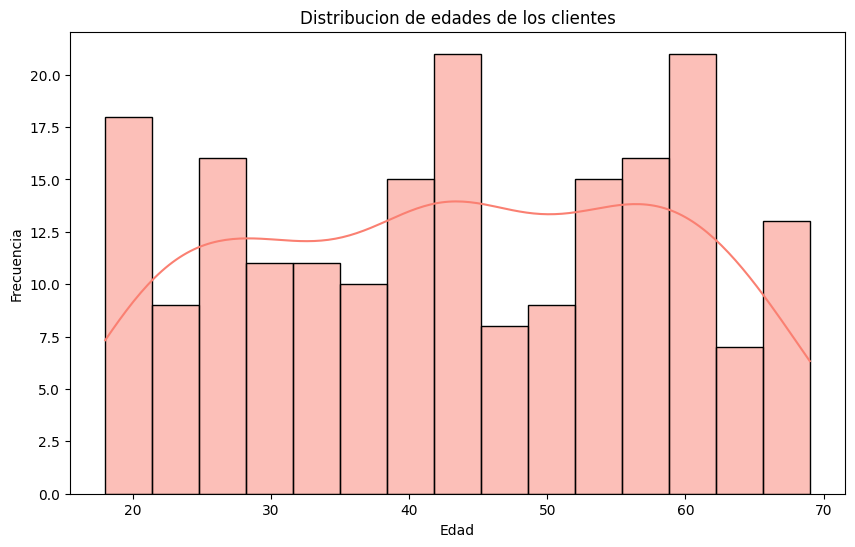

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=clientes, x='edad', bins=15, color='salmon', kde=True)
plt.title('Distribucion de edades de los clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

              Ventas por tipo de clientes

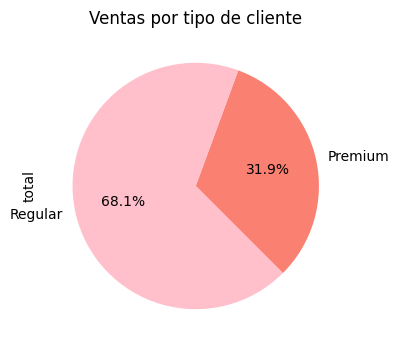

In [ ]:
#grafica circular
plt.figure(figsize=(4,4))
ventas_tipo=ventas_clientes.groupby('tipo_cliente')['total'].sum()
ventas_tipo.plot(kind='pie', autopct='%1.1f%%', colors=['salmon', 'pink'], startangle=-45)
plt.title('Ventas por tipo de cliente')
plt.show()

**Situaciones de análisis**

                Producto más vendido

In [ ]:
productos_top=ventas_clientes['producto'].value_counts().head(5)
print('los productos más vendidos son:')
print(productos_top)

los productos más vendidos son:
producto
Tablet     394
Laptop     389
USB        388
Teclado    386
Mouse      367
Name: count, dtype: int64


              Regiones con más clientes premium

In [ ]:
region_premium=(
    ventas_clientes[ventas_clientes['tipo_cliente']=='Premium']
    ['region'].value_counts()
)
print('las regiones con más clientes premium son:')
print(region_premium)


las regiones con más clientes premium son:
region
Oeste     207
Sur       206
Centro    185
Norte     180
Este      170
Name: count, dtype: int64


              correlación entre compras y edad

In [ ]:
correlacion=ventas_clientes[['edad','total']].corr().iloc[0,1]
print('la correlación entre compras y edad es:')
print(correlacion)

la correlación entre compras y edad es:
0.017306410149443622


            Método de pago más usado

In [ ]:
metodo_pago=ventas_clientes['metodo_pago'].value_counts().idxmax()
print('el método de pago más usado es:')
print(metodo_pago)

el método de pago más usado es:
Tarjeta
